<div class="alert alert-block alert-success">
    
# Imperial Business Analytics OH: WK13-Clustering
    
 👨‍🏫 **Vikesh K**      
 📅 **[08-Feb-2023]** ⏰ **7pm UTC**   
 **Extra Office Hour # 2**
  
</div>

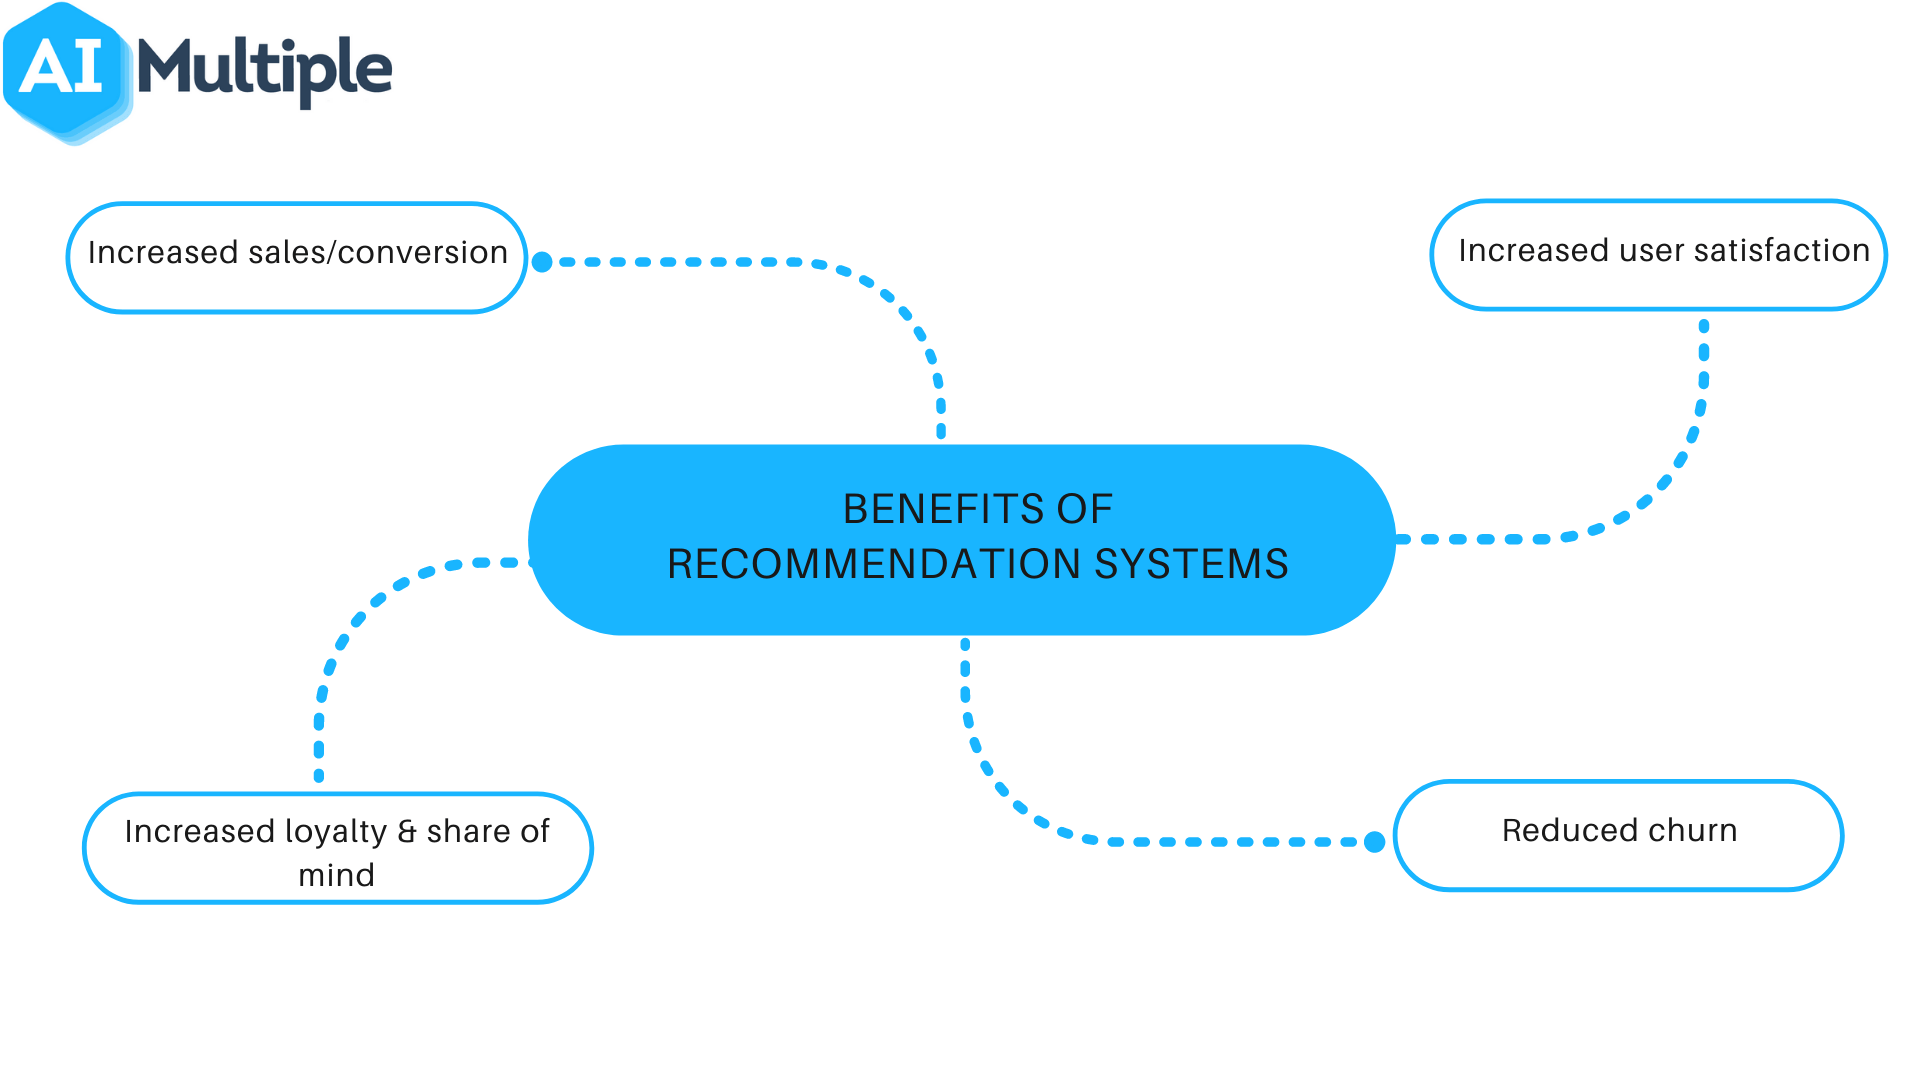

## Import Modules

In [10]:
import pandas as pd
from IPython.display import HTML
import pickle
import os

# pandas options
pd.set_option('display.max_colwidth', None)

## Data 

**Download the data from [Gdrive Link](https://drive.google.com/file/d/1TelyB-yXmvsyqUa1byONUA_kc3HentWk/view?usp=sharing)**

Save it in your working directory printed above

In [11]:
os.getcwd()

'C:\\Users\\Hakim Aljanabi\\Downloads\\Python courses'

In [15]:
df = pd.read_csv('spotify_data.csv')

## Data Exploration

In [16]:
df.shape

(169909, 19)

In [17]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Data Cleaning

In [18]:
df['name'].nunique()

132940

In [19]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [20]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [21]:
numerical_df = df.select_dtypes(['int', 'float'])

In [22]:
numerical_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


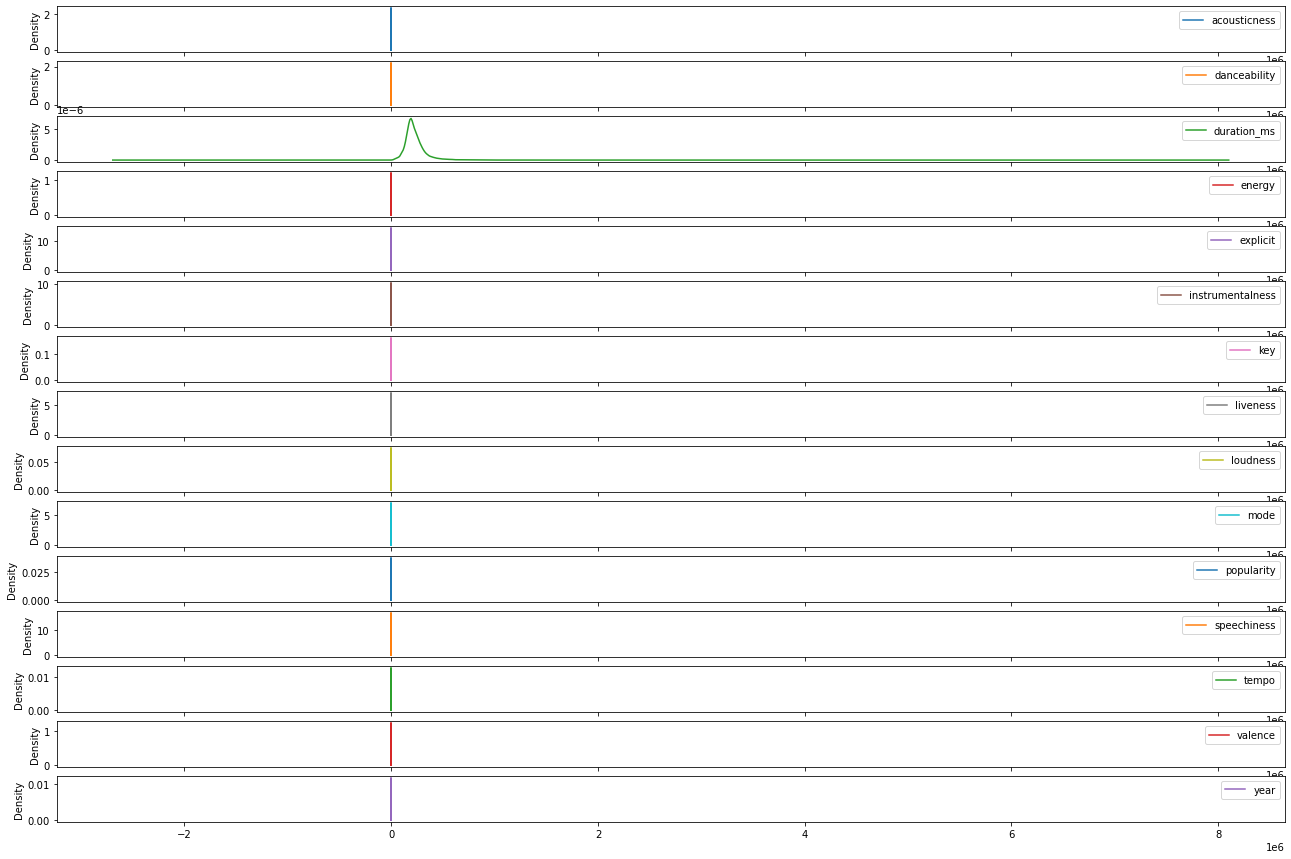

In [23]:
numerical_df.plot(kind = 'kde', subplots = True, figsize = (22, 15));

## Standardizing the values

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

# scaling the dataset
numerical_df_scaled = scaler.fit_transform(numerical_df)

In [26]:
type(numerical_df_scaled)

numpy.ndarray

In [27]:
numerical_df_scaled = pd.DataFrame(numerical_df_scaled, columns = numerical_df.columns)

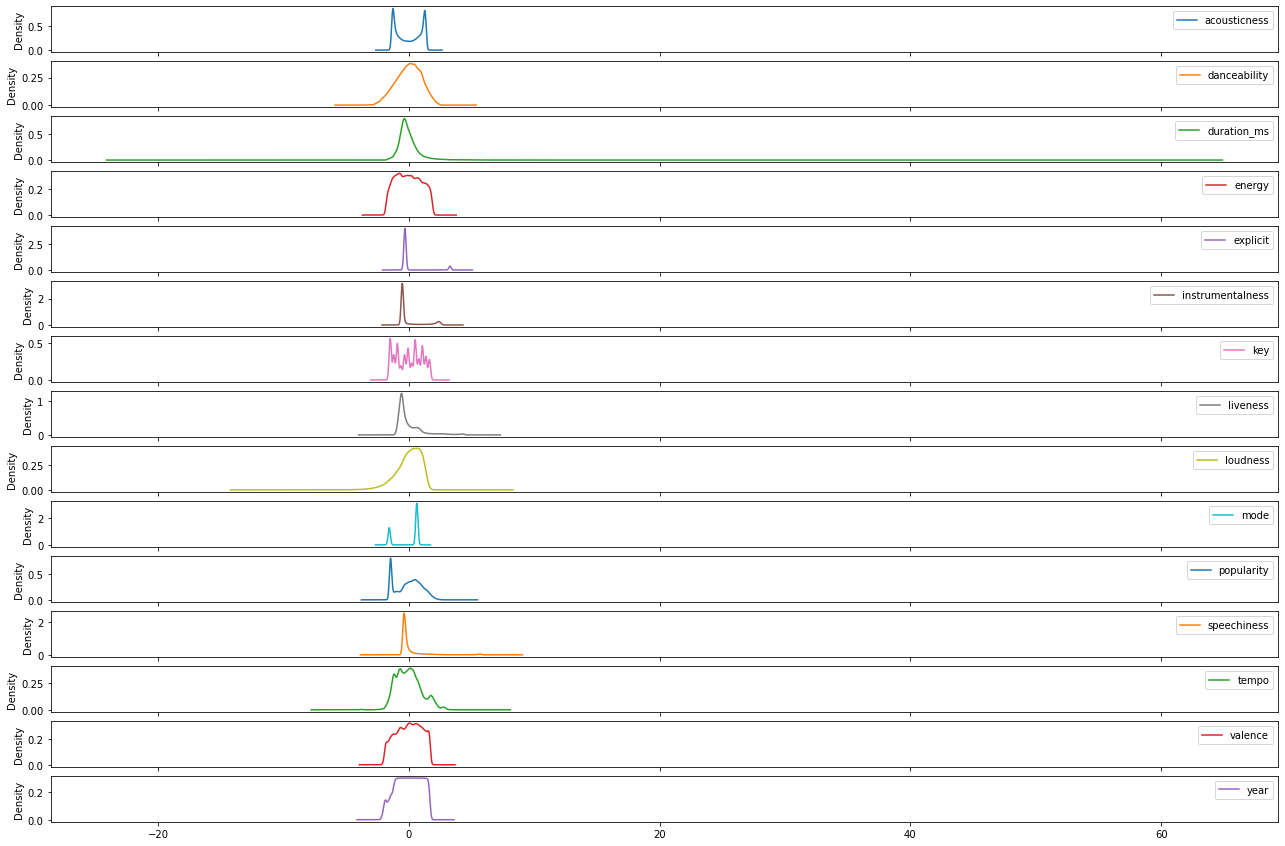

In [28]:
numerical_df_scaled.plot(kind = 'kde', subplots = True, figsize = (22, 15));

## Fit the [`Nearest Neigbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) model

**Unsupervised learner for implementing neighbor searches.**

In [29]:
# calling the model 
from sklearn.neighbors import NearestNeighbors

In [30]:
# initiating the model 
nn = NearestNeighbors(n_neighbors=5)

In [31]:
# fit the model on data. This is unsupervised in nature
nn.fit(numerical_df_scaled)

NearestNeighbors()

### Testing the model to generate predictions

In [32]:
select_song = df.query("name == 'How Would I Know' ").select_dtypes(['int', 'float'])

In [33]:
select_song_scaled = scaler.transform(select_song)

In [34]:
select_song_scaled

array([[ 0.1189138 , -0.13772666, -0.41794844,  0.18851502, -0.30452036,
        -0.51598031,  0.51190746, -0.55821606,  0.35969295,  0.64134354,
         1.78122556,  0.07297942,  0.21974213, -1.44468458,  1.67141853]])

In [35]:
select_song_scaled = pd.DataFrame(select_song_scaled, columns = select_song.columns)

In [36]:
select_song_scaled

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.118914,-0.137727,-0.417948,0.188515,-0.30452,-0.51598,0.511907,-0.558216,0.359693,0.641344,1.781226,0.072979,0.219742,-1.444685,1.671419


**Get the recommendations**

In [37]:
nn.kneighbors(select_song_scaled,  return_distance=True)

(array([[0.        , 0.99593181, 1.10285032, 1.14958619, 1.16673781]]),
 array([[169906,  70323,  86247, 161240,   7703]], dtype=int64))

**Get only the row positions**

In [38]:
# get only the array values
nn.kneighbors(select_song_scaled,  return_distance=True)[1:]

(array([[169906,  70323,  86247, 161240,   7703]], dtype=int64),)

In [39]:
nn.kneighbors(select_song_scaled,  return_distance=False)[:]

array([[169906,  70323,  86247, 161240,   7703]], dtype=int64)

**We will ignore the first recommendation as that is the song itself**

In [40]:
recco_list = nn.kneighbors(select_song_scaled,  return_distance=False)[:,1:].tolist()[0]# Skip the first value 

In [41]:
recco_list

[70323, 86247, 161240, 7703]

**Recommended Song Names**

In [43]:
df.loc[recco_list,['name']]

,name
70323,Intro: Serendipity
86247,If I Ain't Got You
161240,The Few Things (With Charlotte Lawrence)
7703,Carry Me (feat. Julia Michaels)


In [45]:
df.loc[recco_list,['name']]

,name
70323,Intro: Serendipity
86247,If I Ain't Got You
161240,The Few Things (With Charlotte Lawrence)
7703,Carry Me (feat. Julia Michaels)


**Column Addition**

In [46]:
df['song_url'] = 'https://open.spotify.com/track/' + df['id']

In [52]:
neighbors = df.loc[recco_list,['name', 'song_url','year']]

In [53]:
neighbors

,name,song_url,year
70323,Intro: Serendipity,https://open.spotify.com/track/7iV733e1KacKrFRaBNxVEf,2017
86247,If I Ain't Got You,https://open.spotify.com/track/3XVBdLihbNbxUwZosxcGuJ,2003
161240,The Few Things (With Charlotte Lawrence),https://open.spotify.com/track/7BdXiDH2bPhBuPP2jTwRZB,2018
7703,Carry Me (feat. Julia Michaels),https://open.spotify.com/track/3FZEv9JddkjHNFiMVxJYpS,2016


**We need to render the links dynamic**

In [48]:
HTML(neighbors.to_html(render_links=True, escape=False))

,name,song_url
70323,Intro: Serendipity,https://open.spotify.com/track/7iV733e1KacKrFRaBNxVEf
86247,If I Ain't Got You,https://open.spotify.com/track/3XVBdLihbNbxUwZosxcGuJ
161240,The Few Things (With Charlotte Lawrence),https://open.spotify.com/track/7BdXiDH2bPhBuPP2jTwRZB
7703,Carry Me (feat. Julia Michaels),https://open.spotify.com/track/3FZEv9JddkjHNFiMVxJYpS


**Export the model for Streamlit**

In [49]:
filename = 'nn_model_prediction.sav' # name of the file 
pickle.dump(nn, open(filename, 'wb')) # exporting the file

print("file exported")

file exported
